# Annotations Handling Exercise

<a id='toc'></a>
## Table of Contents
 1. <a href='#read'>Reading and Visualizing Annotations</a>
 2. <a href='#create'>Creating Annotations</a>
 3. <a href='#resize'>Resize an image and bounding box</a>
 4. <a href='#qn'> Questions </a>

<a id='read'></a>
## 1. Reading and Visualizing Annotations
<a href='#toc'>^ Back to table of Contents</a>

Draw annotations onto an image given its bounding boxes. This is done with the open cv rectangle method.

- [Reading XML annotations](https://docs.python.org/3/library/xml.etree.elementtree.html)
- [Plotting Rectangles](https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/)
- Reading folders and accessing files
    - [Recommend using os.path.join method](https://docs.python.org/3/library/os.path.html)
    - [Recommend using iterdir method to loop through directories](https://docs.python.org/3/library/pathlib.html)

#### Suggested algorithm outline
```for xml_annotation in folder:

    root = get_root(xml_annotation)
    image = get_image(root)
    bboxes = []
    for object in get_objects(root):
        bboxes.append(get_bbox(object))
    visualize(image, bboxes)
```

C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


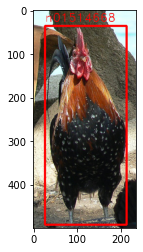

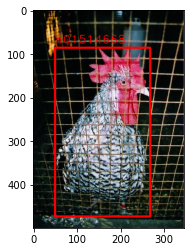

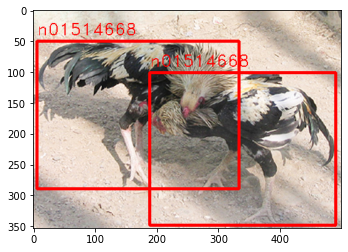

In [1]:
## Main code for 1. Reading and Visualizing Annotations
import xml.etree.ElementTree as ElementTree
import os
import matplotlib.pyplot as plt
import cv2
import re

def get_image_filename(root):
    return root.find('filename').text

def get_objects(root):
    return root.findall('./object')

def get_name(object):
    for name in object.findall('./name'):
        return name.text

def get_bbox(object):
    for item in object.findall('./bndbox'):
        xmin,ymin,xmax,ymax=item[0].text,item[1].text,item[2].text,item[3].text
    return xmin,ymin,xmax,ymax

def visualise(image,name,folder_img,bboxes):
    """Visualise a given image in a folder and its corresponding bounding boxes

    Args:
        image ([str]): filename
        name ([str]): name of the annotation box(es)
        folder_img ([str]): folder name containing the image(s)
        bboxes ([list]): list containing 4 tuples (xmin,xmax,ymin,ymax)

    Returns:
        axes_image[matplotlib.image.AxesImage]: matplotlib axes image showing the image and its corresponding bounding box
    """    ''''''
    
    # finding the file in file directory that matches the filename as
    # the annotations in xml does not contains file extension e.g (.JPEG,.png)
    file_listing=[file for file in os.listdir(folder_img)]
    image_file=[x for x in file_listing if re.search(image,x)][0]
    
    image_array=cv2.imread(os.path.join(folder_img,image_file))
    
    color=(0,0,255)
    thickness=3
    
    # get matplotlib object to return plot for all in the for loop
    _,ax=plt.subplots()
    for bbox in bboxes:
        bbox = list(map(int, bbox))
        start=(bbox[0],bbox[1])

        end=(bbox[2],bbox[3])

        cv2.rectangle(image_array,start,end,color,thickness)
        cv2.putText(image_array,name,(bbox[0],bbox[1]-10),cv2.FONT_HERSHEY_DUPLEX,0.9,color)
    
    axes_image=ax.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))
    return axes_image


folder_annot=os.path.relpath('1.Reading_Annotations/annotation')
folder_img=os.path.relpath('1.Reading_Annotations/images')
img_box_dict={}    

for xml_annotation in os.listdir(folder_annot):
    file=os.path.join(folder_annot,xml_annotation)
    tree=ElementTree.parse(file)
    root=tree.getroot()
    image=get_image_filename(root)

    bboxes=[]
    for object in get_objects(root):
        name=get_name(object)

        bboxes.append(get_bbox(object))

    visualise(image,name,folder_img,bboxes)


### [Exploring pathlib- Object-oriented filesystem paths](https://docs.python.org/3/library/pathlib.html)


In [3]:
from pathlib import Path
p=Path('.')

[x for x in p.iterdir() if x.is_dir()]

[WindowsPath('1.Reading_Annotations'),
 WindowsPath('2.Creating_Annotations'),
 WindowsPath('3. Resize_image_and_bbox')]

In [4]:
for i in p.glob('**/*'):
    print(i)

1.Reading_Annotations
2.Creating_Annotations
3. Resize_image_and_bbox
Annotations Handling Exercise.ipynb
1.Reading_Annotations\annotation
1.Reading_Annotations\images
1.Reading_Annotations\annotation\n01514668_115.xml
1.Reading_Annotations\annotation\n01514668_286.xml
1.Reading_Annotations\annotation\n01514668_359.xml
1.Reading_Annotations\images\n01514668_115.JPEG
1.Reading_Annotations\images\n01514668_286.JPEG
1.Reading_Annotations\images\n01514668_359.JPEG
2.Creating_Annotations\annotation
2.Creating_Annotations\images
2.Creating_Annotations\annotation\robertducky1.xml
2.Creating_Annotations\annotation\robertducky2.xml
2.Creating_Annotations\annotation\robertducky3.xml
2.Creating_Annotations\annotation\robertducky4.xml
2.Creating_Annotations\annotation\robertducky5.xml
2.Creating_Annotations\images\robertducky1.jpg
2.Creating_Annotations\images\robertducky2.jpg
2.Creating_Annotations\images\robertducky3.jpg
2.Creating_Annotations\images\robertducky4.jpg
2.Creating_Annotations\image

In [39]:
p=Path("1.Reading_ Annotations/images")
for x in p.iterdir():

    print(x)


1.Reading_ Annotations\images\n01514668_115.JPEG
1.Reading_ Annotations\images\n01514668_286.JPEG
1.Reading_ Annotations\images\n01514668_359.png


### Rough working

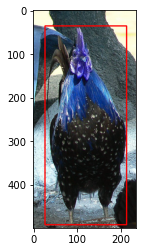

In [8]:
import xml.etree.ElementTree as ElementTree
import os
import matplotlib.pyplot as plt
import cv2

a=cv2.imread('1.Reading_Annotations/images/n01514668_115.JPEG')
start=(27,36)
end=(214,492)
color = (255, 0, 0)
thickness = 2
a = cv2.rectangle(a, start, end, color, thickness)

plt.imshow(a)

In [11]:
import re
test='n01514668_115'
folder_img=os.path.relpath('1.Reading_Annotations/images')
listing=[file for file in os.listdir(folder_img)]

[x for x in listing if re.search(test,x)][0]

'n01514668_115.JPEG'

<a id='create'></a>
## 2. Creating Annotations  
<a href='#toc'>^ Back to table of Contents</a>

Here are some images of a rubber ducky. The task is to build xml annotations around it given the coordinates of the bounding box.

Ground truth boxes for the images (provided as a fraction of the image size):

In [2]:
 ## convert ground truth box coordinates from floating point fractions to pixel values
import numpy as np
from pascal_voc_writer import Writer
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ElementTree
import cv2

gt_boxes = [
            np.array([[0.436, 0.591, 0.629, 0.712]], dtype=np.float32),
            np.array([[0.539, 0.583, 0.73, 0.71]], dtype=np.float32),
            np.array([[0.464, 0.414, 0.626, 0.548]], dtype=np.float32),
            np.array([[0.313, 0.308, 0.648, 0.526]], dtype=np.float32),
            np.array([[0.256, 0.444, 0.484, 0.629]], dtype=np.float32)
]
folder_img=os.path.relpath('2.Creating_Annotations/images')
folder_annot=os.path.relpath('2.Creating_Annotations/annotation')


# finding x and y (pixel value of picture)
filename=os.listdir(folder_img)[0]
print(filename)
img_array=plt.imread(f'{folder_img}/{filename}')
x,y,_=img_array.shape

pixel_boxes=[]
for item in gt_boxes:
    item[0,0]=int(np.round(item[0,0]*x))
    item[0,1]=int(np.round(item[0,1]*y))
    item[0,2]=int(np.round(item[0,2]*x))
    item[0,3]=int(np.round(item[0,3]*y))
    item=item.astype('int')
    pixel_boxes.append(item)
print(pixel_boxes)
## Build xml annotations with rubber ducky label.
img_listing=os.listdir(folder_img)

for file,pixel_box in zip(img_listing,pixel_boxes):
    path=f'{folder_img}/{file}'
    img_array=plt.imread(path)
    height,width,_=img_array.shape
    ymin, xmin, ymax, xmax=pixel_box[0,0],pixel_box[0,1],pixel_box[0,2],pixel_box[0,3]
    writer=Writer(path, width, height)
    writer.addObject('ducky', xmin, ymin, xmax, ymax)
    saved_filename=f'{file.split(".")[0]}.xml'
    writer.save(os.path.join(folder_annot,saved_filename))
    print(f'{saved_filename} saved in folder: {folder_annot}')
    

robertducky1.jpg
[array([[279, 504, 403, 607]]), array([[345, 497, 467, 606]]), array([[297, 353, 401, 467]]), array([[200, 263, 415, 449]]), array([[164, 379, 310, 537]])]
robertducky1.xml saved in folder: 2.Creating_Annotations\annotation
robertducky2.xml saved in folder: 2.Creating_Annotations\annotation
robertducky3.xml saved in folder: 2.Creating_Annotations\annotation
robertducky4.xml saved in folder: 2.Creating_Annotations\annotation
robertducky5.xml saved in folder: 2.Creating_Annotations\annotation


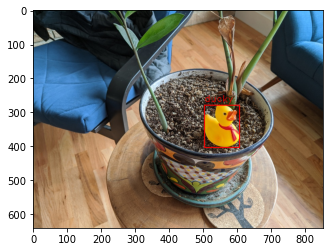

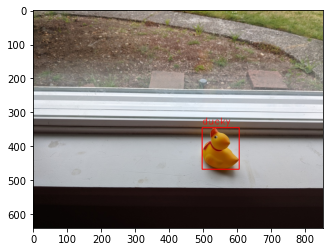

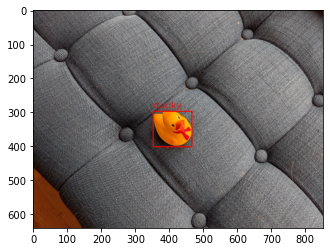

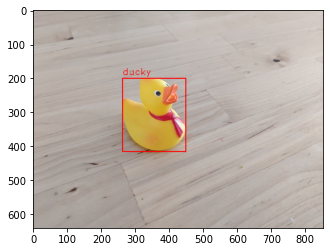

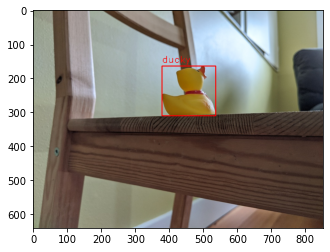

In [3]:
###To check your annotations, try visualizing it to verify
def get_image_filename(root):
    return root.find('filename').text

def get_objects(root):
    return root.findall('./object')


def get_bbox(object):
    for item in object.findall('./bndbox'):
        xmin,ymin,xmax,ymax=item[0].text,item[1].text,item[2].text,item[3].text
    return xmin,ymin,xmax,ymax


def get_name(object):
    for name in object.findall('./name'):
        return name.text
    
def visualise_complete_filename(image,name,folder_img,bboxes):
    
    image_array=cv2.imread(os.path.join(folder_img,image))        
    color=(0,0,255)
    thickness=2
    
    # get matplotlib object to return plot for all in the for loop
    f,ax=plt.subplots()
    for bbox in bboxes:
        bbox = list(map(int, bbox))
        start=(bbox[0],bbox[1])

        end=(bbox[2],bbox[3])
        cv2.rectangle(image_array,start,end,color,thickness)
        cv2.putText(image_array,name,(bbox[0],bbox[1]-10),cv2.FONT_HERSHEY_DUPLEX,0.9,color)
    
    return ax.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))


folder_annot=os.path.relpath('2.Creating_Annotations/annotation')
folder_img=os.path.relpath('2.Creating_Annotations/images')
img_box_dict={}

for xml_annotation in os.listdir(folder_annot):
    file=f'{folder_annot}\{xml_annotation}'
    tree=ElementTree.parse(file)
    root=tree.getroot()
    image=get_image_filename(root)

    bboxes=[]
    
    for object in get_objects(root):
        name=get_name(object)
        bboxes.append(get_bbox(object))
    img_box_dict[image,name]=bboxes
    visualise_complete_filename(image,name,folder_img,bboxes)


<a id='resize'></a>

## 3. Resize an image and bounding box
<a href='#toc'>^ Back to table of Contents</a>

Let's try resizing and then saving the rubber ducky images and their respective bounding boxes.

Turn the images into 640x640 pictures. The images will hence have a different aspect ratio from the original. 

For resizing the image, you would want to use the resize with pad (will pad the image with black bars on either the sides or top and bottom).


There are multiple ways to do this:
- [Pytorch](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize) 
- [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/image/resize_with_pad)
-  [OpenCV](https://pythonexamples.org/python-opencv-cv2-resize-image/)
- [PIL](https://www.geeksforgeeks.org/python-pil-image-resize-method/)

Note that the bounding boxes will hence have to be rescaled appropriately and also shifted (either to the right or down) to take into account the padding.

### Reference
- [Stackoverflow Reply](https://stackoverflow.com/questions/49466033/resizing-image-and-its-bounding-box)
- To explore Chitra in future at [here](https://chitra.readthedocs.io/en/latest/)
- After applying tf.resize_image_with_pad() to image need to use tf.cast to convert the datatype to unint8

C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\mpe_0\miniconda3\envs\torch\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


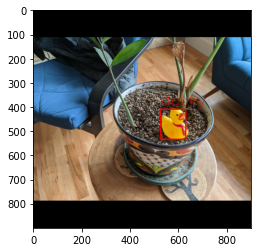

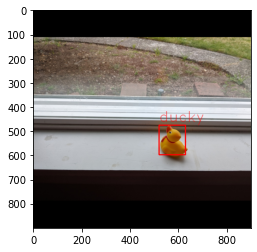

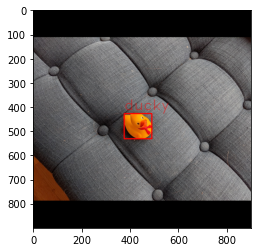

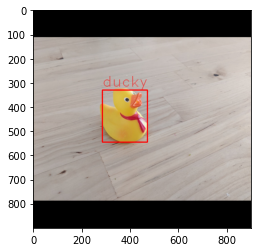

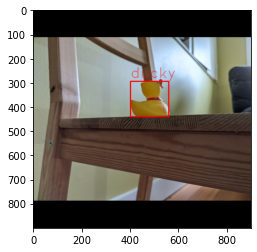

In [1]:
## Main code for 3. Resize an image and bounding box
import xml.etree.ElementTree as ElementTree
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf

def get_image_filename(root):
    return root.find('filename').text

def get_objects(root):
    return root.findall('./object')

def get_name(object):
    for name in object.findall('./name'):
        return name.text

def get_bbox(object):
    for item in object.findall('./bndbox'):
        xmin,ymin,xmax,ymax=item[0].text,item[1].text,item[2].text,item[3].text
    return xmin,ymin,xmax,ymax


def rescale(i,i_scale):
    return int(np.round(i*i_scale))

def shift(i,i_shift):
    return int(np.round(i+i_shift))

def visualise_padded_img_tf(image,name,folder_img,bboxes,new_y,new_x):
    
    image_file=os.path.join(folder_img,image)

    image_array=cv2.imread(image_file)
    orig_y,orig_x,_=image_array.shape
    image_array=tf.image.resize_with_pad(
    image_array, new_y, new_x,)
    image_array=tf.cast(
    image_array, tf.uint8)
    # convert to numpy array as cv2 does not accept tf
    image_array=image_array.numpy()
    x_shift=int(np.round((new_x-orig_x)//2))
    y_shift=int(np.round((new_y-orig_y)//2))
    color=(0,0,255)
    thickness=3
    # get matplotlib to return plot for all in for loop
    f,ax=plt.subplots()
    for bbox in bboxes:
        bbox = list(map(int, bbox))
        xmin=shift(bbox[0],x_shift)
        ymin=shift(bbox[1],y_shift)
        xmax=shift(bbox[2],x_shift)
        ymax=shift(bbox[3],y_shift)
        start=(xmin,ymin)

        end=(xmax,ymax)

        cv2.rectangle(image_array,start,end,color,thickness)
        cv2.putText(image_array,name,(xmin,ymin-15),cv2.FONT_HERSHEY_DUPLEX,2,color)
        
    return ax.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))

###desired padded_img size
NEW_Y=900
NEW_X=900
NEW_SIZE=900

folder_annot=os.path.relpath('2.Creating_Annotations/annotation')
folder_img=os.path.relpath('2.Creating_Annotations/images')
img_box_dict={}

for xml_annotation in os.listdir(folder_annot):
    file=f'{folder_annot}\{xml_annotation}'
    tree=ElementTree.parse(file)
    root=tree.getroot()
    image=get_image_filename(root)


    bboxes=[]
    for object in get_objects(root):
        name=get_name(object)
        bboxes.append(get_bbox(object))

    visualise_padded_img_tf(image,name,folder_img,bboxes,NEW_Y,NEW_X)

### Trial of resize function in other modules

#### Trial of resizing with OpenCV

640 853
(900, 8000, 3)


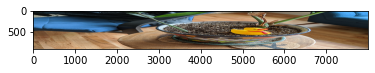

In [18]:
## resizing with OpenCV
import cv2
image=plt.imread('C:/Users/mpe_0/DA/Resources/Annotations-Handling-Exercise/2.Creating_Annotations/images/robertducky1.jpg')
orig_h,orig_w,_=image.shape
print(orig_h,orig_w)

new_h,new_w=(900,8000)
image=cv2.resize(image,(new_w,new_h))
print(image.shape)
plt.imshow(image)

#### Trial of resizing with pad with PIL

In [30]:
### code from online
## Link: https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
from PIL import Image, ImageOps

desired_size = 1000
im_pth = '2.Creating_Annotations/images/robertducky1.jpg'

im = Image.open(im_pth)
old_size = im.size  # old_size[0] is in (width, height) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
# use thumbnail() or resize() method to resize the input image

# thumbnail is a in-place operation

# im.thumbnail(new_size, Image.ANTIALIAS)

im = im.resize(new_size, Image.ANTIALIAS)
# create a new image and paste the resized on it

new_im = Image.new("RGB", (desired_size, desired_size))
new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))

new_im.show()

#### Trial of resizing with torchvision

For PIL, it is displayed as Column (width),Row (height): (853, 640)
For matplotlib, it is displayed as Row (height),Column (width),channel: (640, 853, 3)


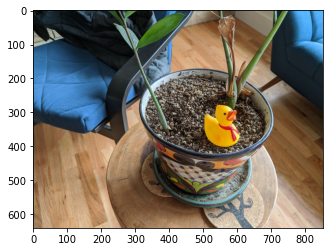

In [31]:
from PIL import Image
import torchvision

target_height,target_width=900,1000
# to use torchvision resize, will need to pass in PIL image
sample_img_PIL=Image.open('2.Creating_Annotations/images/robertducky1.jpg',mode='r')
sample_img_plt=plt.imread('2.Creating_Annotations/images/robertducky1.jpg')
print(f'For PIL, it is displayed as Column (width),Row (height): {sample_img_PIL.size}')
print(f'For matplotlib, it is displayed as Row (height),Column (width),channel: {sample_img_plt.shape}')
plt.imshow(sample_img_plt)

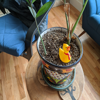

In [33]:
## resizing with torchvision
from PIL import Image
import torchvision

target_height,target_width=100,100
# to use torchvision resize, will need to pass in PIL image
sample_img_PIL=Image.open('2.Creating_Annotations/images/robertducky1.jpg',mode='r')
orig_width,orig_height=sample_img_PIL.size

## resize with torchvision
resize_torch=torchvision.transforms.Resize((target_height,target_width))
resize_torch(sample_img_PIL)

## resize with PIL
sample_img_PIL.resize((target_width,target_height))

#### Trial of resizing with tensorflow

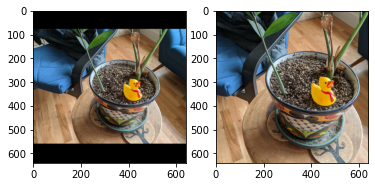

In [37]:
## Resizing with tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

sample_img=plt.imread('2.Creating_Annotations/images/robertducky1.jpg')
# orig_h,orig_w,_=sample_img.shape
target_height,target_width=640,640

image_1=tf.image.resize_with_pad(
    sample_img, target_height, target_width, method=tf.image.ResizeMethod.BILINEAR,antialias=False
)

image_2=tf.image.resize_with_crop_or_pad(
    sample_img, target_height, target_width,
)
## casting image to integer
image_1=tf.cast(image_1, tf.uint8)
image_2=tf.cast(image_2,tf.uint8)


f,ax=plt.subplots(1,2)
ax[0].imshow(image_1)
ax[1].imshow(image_2)

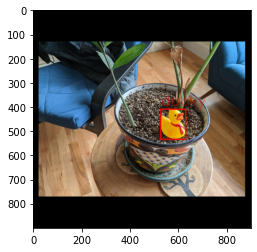

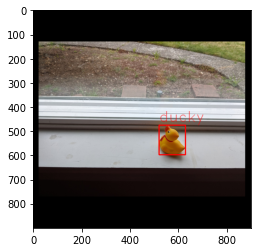

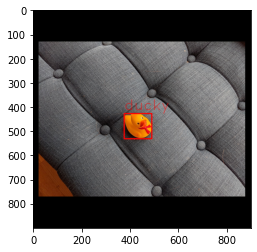

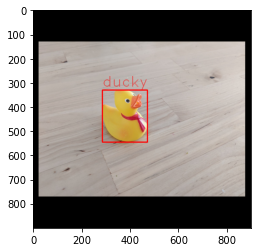

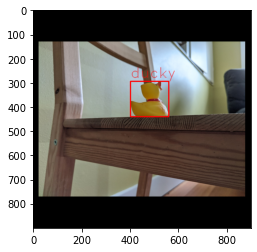

In [42]:
### trying out functions for ducky images 
import xml.etree.ElementTree as ElementTree
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf

###desired padded_img size
NEW_Y=900
NEW_X=900
NEW_SIZE=900

def get_image_filename(root):
    return root.find('filename').text

def get_objects(root):
    return root.findall('./object')

def get_name(object):
    for name in object.findall('./name'):
        return name.text

def get_bbox(object):
    for item in object.findall('./bndbox'):
        xmin,ymin,xmax,ymax=item[0].text,item[1].text,item[2].text,item[3].text
    return xmin,ymin,xmax,ymax


def rescale(i,i_scale):
    return int(np.round(i*i_scale))

def shift(i,i_shift):
    return int(np.round(i+i_shift))

def visualise_padded_img_crop(image,name,folder_img,bboxes,new_y,new_x):
    
    image_file=os.path.join(folder_img,image)

    image_array=cv2.imread(image_file)
    orig_y,orig_x,_=image_array.shape
    image_array=tf.image.resize_with_crop_or_pad(
    image_array, new_y, new_x,)
    image_array=tf.image.convert_image_dtype(
    image_array, 'uint8',)
    # convert to numpy array as cv2 does not accept tf
    image_array=image_array.numpy()
    x_shift=int(np.round((new_x-orig_x)//2))
    y_shift=int(np.round((new_y-orig_y)//2))
    color=(0,0,255)
    thickness=3
    # get matplotlib to return plot for all in for loop
    f,ax=plt.subplots()
    for bbox in bboxes:
        bbox = list(map(int, bbox))
        xmin=shift(bbox[0],x_shift)
        ymin=shift(bbox[1],y_shift)
        xmax=shift(bbox[2],x_shift)
        ymax=shift(bbox[3],y_shift)
        start=(xmin,ymin)

        end=(xmax,ymax)

        cv2.rectangle(image_array,start,end,color,thickness)
        cv2.putText(image_array,name,(xmin,ymin-15),cv2.FONT_HERSHEY_DUPLEX,2,color)
        
    return ax.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))

def visualise_padded_img_cv(image,name,folder_img,bboxes,new_size):
    
    image_file=os.path.join(folder_img,image)

    image_array=cv2.imread(image_file)
    old_size=image_array.shape[:2]
    orig_y,orig_x=old_size
    ratio = float(new_size)/max(old_size)
    resized_size = tuple([int(x*ratio) for x in old_size])
    image_array = cv2.resize(image_array, (resized_size[1], resized_size[0]))

    delta_w = new_size - resized_size[1]
    delta_h = new_size - resized_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    x_shift=int(np.round((new_size-orig_x)//2))
    y_shift=int(np.round((new_size-orig_y)//2))
    color_bbox=(0,0,255)
    color_pad=(0,0,0)
    thickness=3
    
    image_array = cv2.copyMakeBorder(image_array, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color_pad)
    # get matplotlib to return plot for all in for loop
    f,ax=plt.subplots()
    for bbox in bboxes:
        bbox = list(map(int, bbox))
        xmin=shift(bbox[0],x_shift)
        ymin=shift(bbox[1],y_shift)
        xmax=shift(bbox[2],x_shift)
        ymax=shift(bbox[3],y_shift)
        start=(xmin,ymin)

        end=(xmax,ymax)

        cv2.rectangle(image_array,start,end,color_bbox,thickness)
        cv2.putText(image_array,name,(xmin,ymin-15),cv2.FONT_HERSHEY_DUPLEX,2,color_bbox)
        
    return ax.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))


def visualise_resized_img_cv(image,name,folder_img,bboxes,new_y,new_x):
    
    image_file=os.path.join(folder_img,image)

    image_array=cv2.imread(image_file)
    orig_y,orig_x,_=image_array.shape
    image_array=cv2.resize(image_array,(new_x,new_y),interpolation=cv2.INTER_CUBIC)
    x_scale = new_x / orig_x
    y_scale = new_y/ orig_y
    color=(0,0,255)
    thickness=3
    # get matplotlib to return plot for all in for loop
    f,ax=plt.subplots()
    for bbox in bboxes:
        bbox = list(map(int, bbox))
        xmin=rescale(bbox[0],x_scale)
        ymin=rescale(bbox[1],y_scale)
        xmax=rescale(bbox[2],x_scale)
        ymax=rescale(bbox[3],y_scale)
        start=(xmin,ymin)

        end=(xmax,ymax)

        cv2.rectangle(image_array,start,end,color,thickness)
        cv2.putText(image_array,name,(xmin,ymin-2),cv2.FONT_HERSHEY_PLAIN,0.1,color)
        
    return ax.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))

def visualise_padded_img_crop(image,name,folder_img,bboxes,new_y,new_x):
    
    image_file=os.path.join(folder_img,image)

    image_array=cv2.imread(image_file)
    orig_y,orig_x,_=image_array.shape
    image_array=tf.image.resize_with_crop_or_pad(
    image_array, new_y, new_x,)
    image_array=tf.image.convert_image_dtype(
    image_array, 'uint8',)
    # convert to numpy array as cv2 does not accept tf
    image_array=image_array.numpy()
    x_shift=int(np.round((new_x-orig_x)//2))
    y_shift=int(np.round((new_y-orig_y)//2))
    color=(0,0,255)
    thickness=3
    # get matplotlib to return plot for all in for loop
    f,ax=plt.subplots()
    for bbox in bboxes:
        bbox = list(map(int, bbox))
        xmin=shift(bbox[0],x_shift)
        ymin=shift(bbox[1],y_shift)
        xmax=shift(bbox[2],x_shift)
        ymax=shift(bbox[3],y_shift)
        start=(xmin,ymin)

        end=(xmax,ymax)

        cv2.rectangle(image_array,start,end,color,thickness)
        cv2.putText(image_array,name,(xmin,ymin-15),cv2.FONT_HERSHEY_DUPLEX,2,color)
        
    return ax.imshow(cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB))

 
folder_annot=os.path.relpath('2.Creating_Annotations/annotation')
folder_img=os.path.relpath('2.Creating_Annotations/images')
img_box_dict={}

for xml_annotation in os.listdir(folder_annot):
    file=f'{folder_annot}\{xml_annotation}'
    tree=ElementTree.parse(file)
    root=tree.getroot()
    image=get_image_filename(root)


    bboxes=[]
    for object in get_objects(root):
        name=get_name(object)
        bboxes.append(get_bbox(object))

    visualise_padded_img_crop(image,name,folder_img,bboxes,NEW_Y,NEW_X)


<a id='qn'></a>

## 4. Questions

<a href='#toc'>^ Back to table of Contents</a>

1. Why the annotation xml for question 1 does not contains the file extension, is it normal to have such an annotation

- Usually contains the file extension, but if not, usually for a folder, rename all to the same file extension and loop through

2. Question 3: Are you referring to resize to the same aspect ratio then padding?
- resize to preserve the same aspect ratio and then do padding
3. tf.image.resize_with_pad() returns a weird image, use tf.image.resize_with_crop_or_pad() instead

4. Help with Webscraping project